In [161]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
# read in SIDER data

drug_atc = pd.read_csv("data/drug_atc.tsv", sep='\t', header=None)
drug_atc.columns = ["drug_id", "ATC_code"]

drug_names = pd.read_csv("data/drug_names.tsv", sep='\t', header=None)
drug_names.columns = ["drug_id", "drug_name"]

drug_indications = pd.read_csv("data/meddra_all_indications.tsv", sep='\t', header=None)
drug_indications.columns = ["drug_id", "UMLS_concept_label", "method_of_detection", "concept_name", "meddra_concept_type", "UMLS_concept_meddra", "meddra_concept_name"]

drug_se = pd.read_csv("data/meddra_all_se.tsv", sep='\t', header=None)
drug_se.columns = ["drug_id", "drug_id_stereo", "UMLS_concept_label", "meddra_concept_type", "UMLS_concept_meddra", "side_effect_name"]

meddra = pd.read_csv("data/meddra.tsv", sep='\t', header=None)
meddra.columns = ["UMLS_concept_id", "meddra_id", "meddra_concept_type", "side_effect_name"]

In [ ]:
# read in drugbank data



## SIDER Data EDA


In [95]:
# total num drugs

len(drug_names)

1430

In [110]:
# average number of side effects per drug

drug_to_se = drug_se.groupby("drug_id", as_index=False).agg({"side_effect_name": list, "UMLS_concept_meddra": list})
drug_to_se['unique_se'] = [len(np.unique(x)) for x in drug_to_se.UMLS_concept_meddra]

np.mean(drug_to_se.unique_se)

113.88181818181818

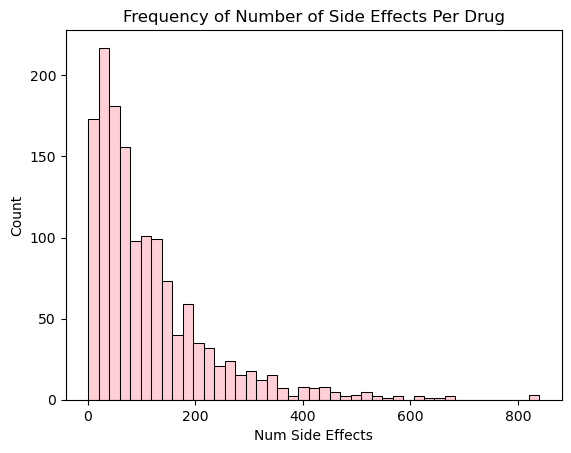

In [132]:
# histogram of number of side effects for each drug

sns.histplot(drug_to_se, x="unique_se", color='pink')
plt.xlabel("Num Side Effects")
plt.title("Frequency of Number of Side Effects Per Drug");

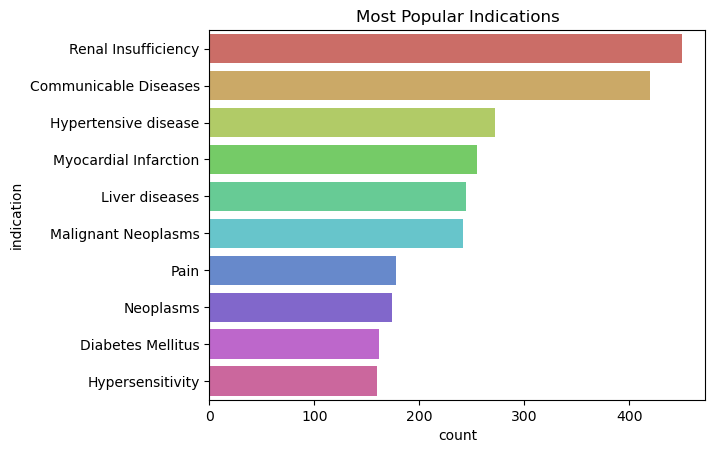

In [91]:
# most common drug indications

indications = Counter(drug_indications.concept_name)
i_df = pd.DataFrame({"indication": indications.keys(), "count": indications.values()})
i_df = i_df.sort_values("count", ascending=False)


sns.barplot(i_df.head(10), y="indication", x="count", \
            palette = sns.color_palette("hls", 10)) \
            .set(title="Most Popular Indications");

In [136]:
drug_se

,drug_id,drug_id_stereo,UMLS_concept_label,meddra_concept_type,UMLS_concept_meddra,side_effect_name
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain
...,...,...,...,...,...,...
309844,CID171306834,CID071306834,C3203358,PT,C1145670,Respiratory failure
309845,CID171306834,CID071306834,C3665386,LLT,C3665386,Abnormal vision
309846,CID171306834,CID071306834,C3665386,PT,C3665347,Visual impairment
309847,CID171306834,CID071306834,C3665596,LLT,C3665596,Warts


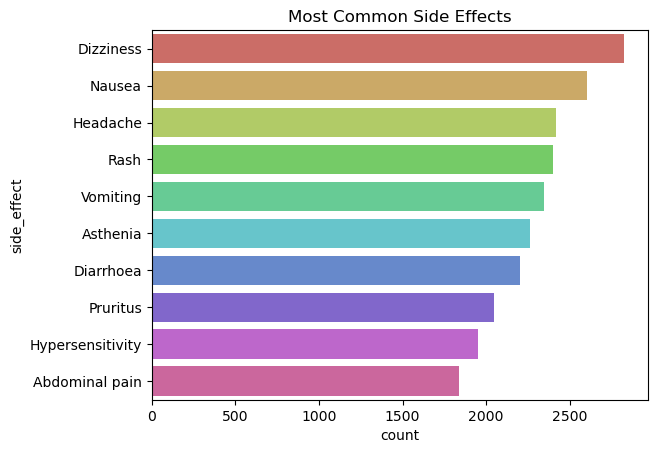

In [93]:
# most common side effects

se = Counter(drug_se.side_effect_name)
se_df = pd.DataFrame({"side_effect": se.keys(), "count": se.values()})
se_df = se_df.sort_values("count", ascending=False)


sns.barplot(se_df.head(10), y="side_effect", x="count", \
            palette = sns.color_palette("hls", 10)) \
            .set(title="Most Common Side Effects");

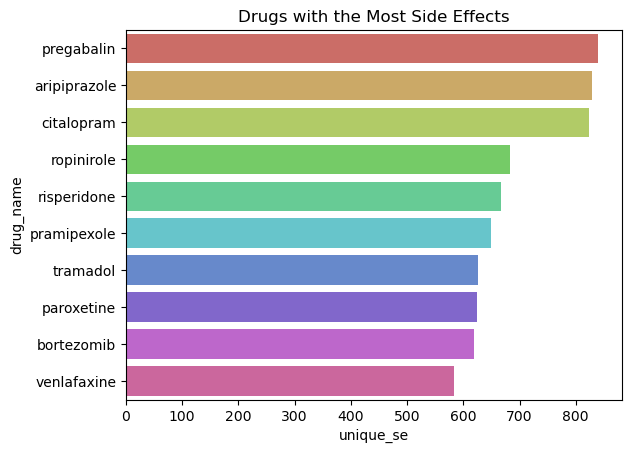

In [156]:
# drugs with the most side effects

most_se = drug_to_se.sort_values("unique_se", ascending=False).head(10)
most_se_names = pd.merge(most_se, drug_names, how="left", left_on="drug_id", right_on="drug_id")
most_se_names["unique_side_effects"] = [np.unique(s) for s in most_se_names.side_effect_name]

sns.barplot(most_se_names, x="unique_se", y="drug_name", \
    palette = sns.color_palette("hls", 10)) \
    .set(title="Drugs with the Most Side Effects");


## DrugBank Data EDA